<a href="https://colab.research.google.com/github/srijayjk/Computer-Vision/blob/main/OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import cv2
from google.colab.patches import cv2_imshow

In [23]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

(512, 512, 3)


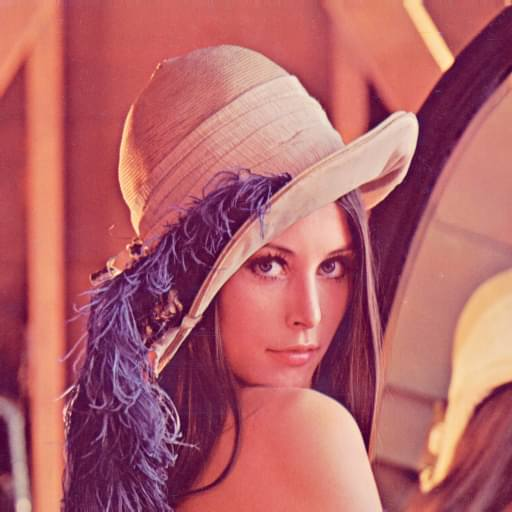

In [30]:
img = cv2.imread("lena30.jpg", 1)
print(img.shape)
cv2_imshow(img)
cv2.waitKey(0)

cv2.destroyAllWindows()

Convert Color image to Gray scale image

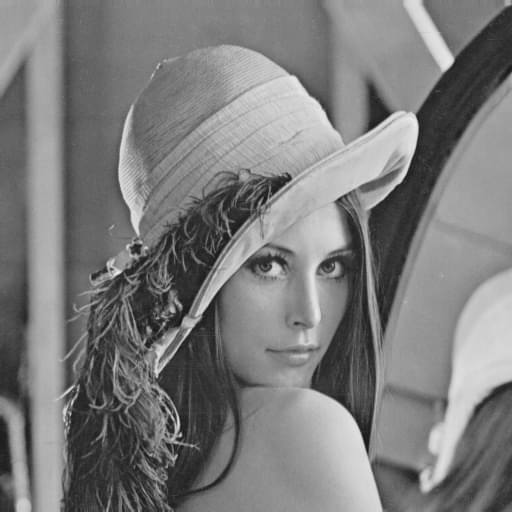

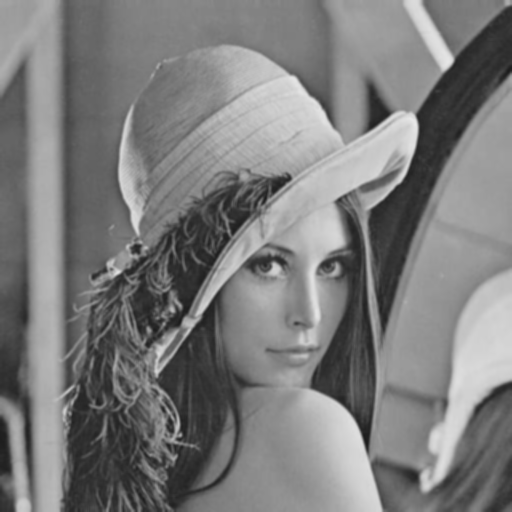

In [48]:
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgBlur = cv2.GaussianBlur(imgGray, (3, 3), 5)
cv2_imshow(imgGray)
cv2_imshow(imgBlur)

Canny Edge Detector Working

- Noise Reduction
- Finding Intensity Gradient of the Image
- Non-maximum Suppression
- Hysteresis Thresholding (150, 200)(minVal, maxVal)



Image without blur


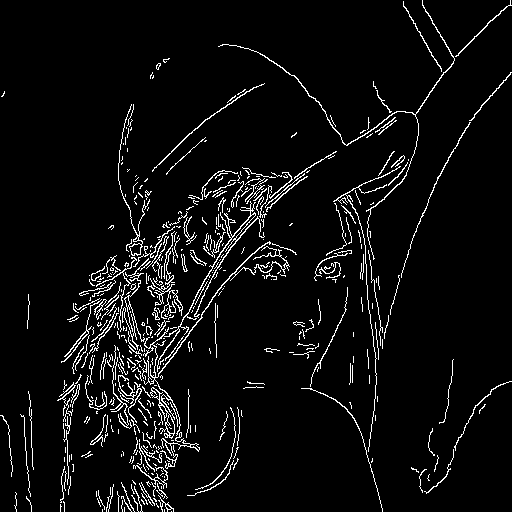

Image with blur


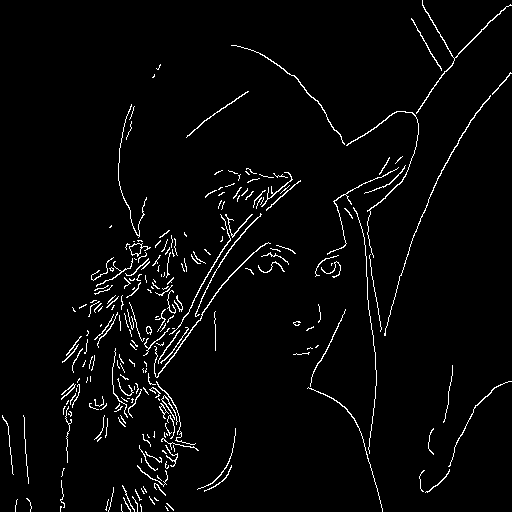

In [49]:
imgCanny = cv2.Canny(img, 150, 200)
imgCanny1 = cv2.Canny(imgBlur, 150, 200)

print("Image without blur")# Retain all high frequency components
cv2_imshow(imgCanny)
print("Image with blur") # All high frequency components are filtered by gaussian filter
cv2_imshow(imgCanny1)

Dialation

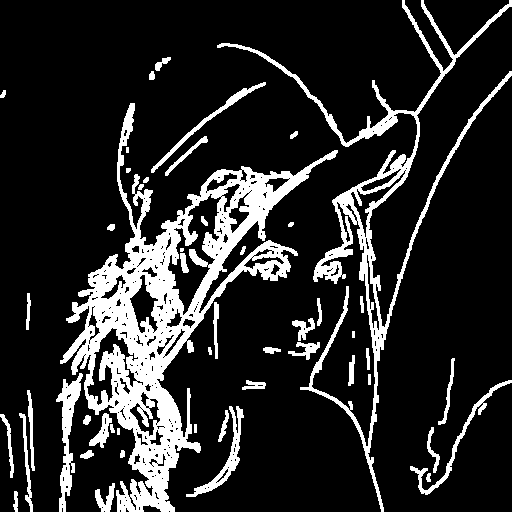

In [53]:
import numpy as np
kernel = np.ones((3, 3), np.uint8)
imgDialation = cv2.dilate(imgCanny, kernel, iterations=1 )
cv2_imshow(imgDialation)

Erode

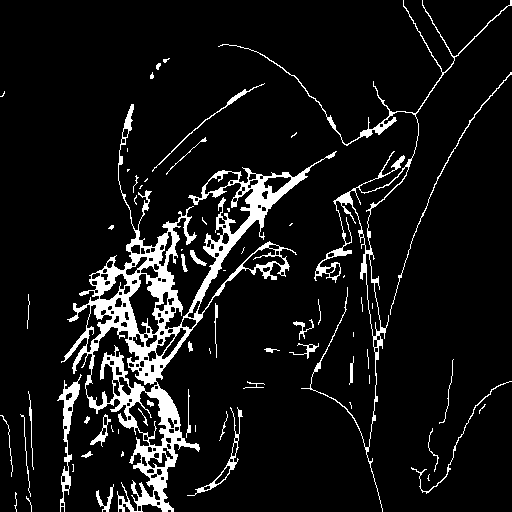

In [54]:
imgErode = cv2.erode(imgDialation, kernel, iterations=1)
cv2_imshow(imgErode)

Resizing and Cropping

In [55]:
print(img.shape)

(512, 512, 3)


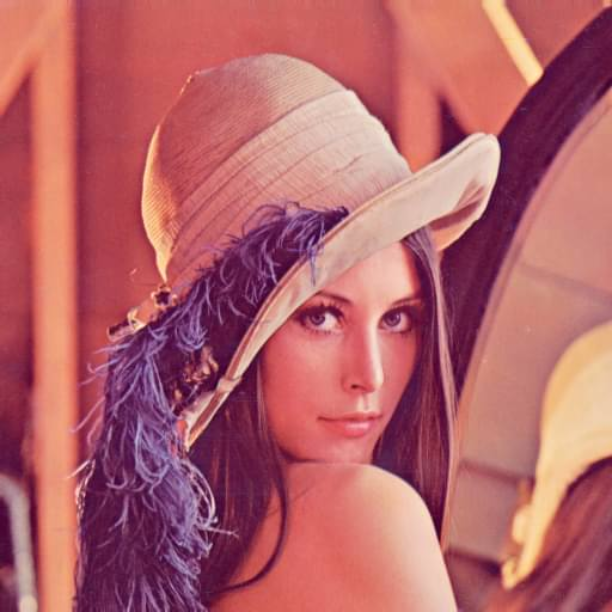

(612, 612, 3)


In [58]:
imgResize = cv2.resize(img, (612, 612))
cv2_imshow(imgResize)
print(imgResize.shape)

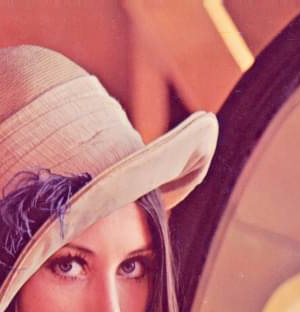

In [60]:
imgCropped = img[0:312, 200:500]
cv2_imshow(imgCropped)

Shapes and Text

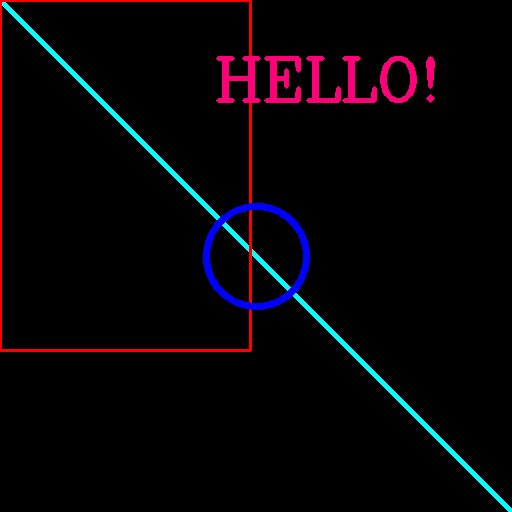

In [84]:
testImg = np.zeros((512, 512, 3), np.uint8)
#testImg[200:300, 100:300] = 100, 255, 255

cv2.line(testImg, (0,0), (testImg.shape[1], testImg.shape[0]), (255, 255, 0), 3)
cv2.rectangle(testImg, (0, 0), (250, 350), (0, 0, 255), 2)
cv2.circle(testImg, (256, 256), 50, (255, 0, 0), 5)
cv2.putText(testImg, "  HELLO!  ", (150, 100), cv2.FONT_HERSHEY_COMPLEX, 2, (120, 0, 255), 3)
cv2_imshow(testImg)


WARP Perspective

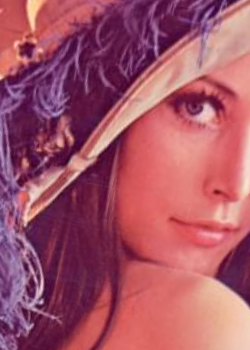

In [86]:
width, height = 250, 350
pts1 = np.float32([[111, 219], [287, 188], [154, 482], [352, 440]])
pts2 = np.float32([[0, 0], [width, 0], [0, height], [width, height]])
matrix = cv2.getPerspectiveTransform(pts1, pts2)
imgOut = cv2.warpPerspective(img, matrix, (width, height))
cv2_imshow(imgOut)

Join Images

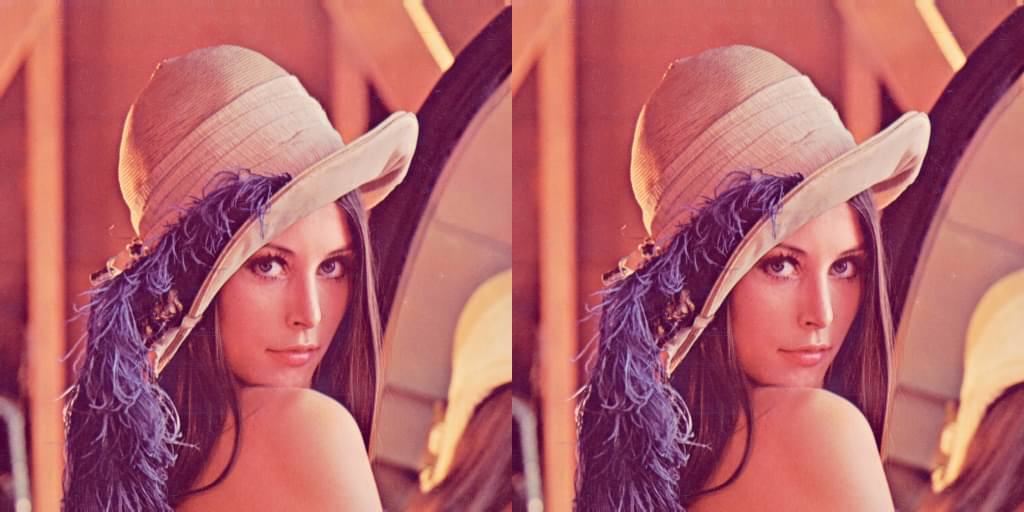

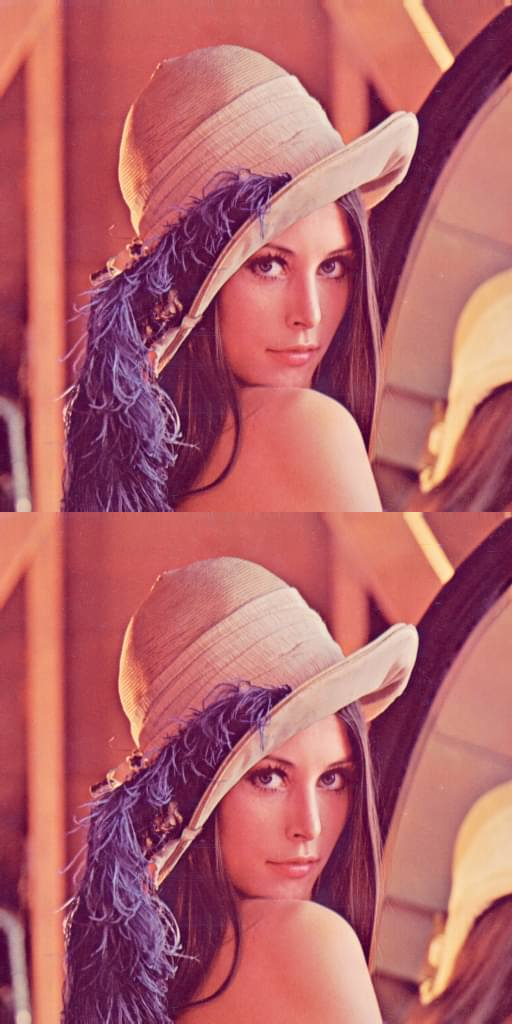

In [89]:
imgHor = np.hstack((img, img))
imgVert = np.vstack((img, img))
cv2_imshow(imgHor)
cv2_imshow(imgVert)